In [15]:
import pandas as pd


In [16]:
condemned = pd.read_csv("Condemned_Houses.csv", sep = ",")


In [17]:
condemned.head()

,_id,parcel_id,address,owner,property_type,date,latest_inspection_result,latest_inspection_score,inspection_status
0,1286147,0081E00049000000,No primary address specified,SAYER REAL ESTATE LLC,Condemned Property,2021-01-22,Fail,16.0,Inactive
1,1286148,0023C00208000000,"11 LANARK ST, Pittsburgh, PA 15214",CITY OF BRIDGES CLT,Condemned Property,2021-04-07,Fail,26.0,Inactive
2,1286149,0011J00145000000,"211 GIST ST, Pittsburgh, 15219",ECKENRODE ROBERT C,Condemned Property,2022-04-07,Fail,8.0,Inactive
3,1286150,0174L00014000000,No primary address specified,BATTLE RAYNA,Condemned Property,2020-05-19,Fail,15.0,Inactive
4,1286151,0081A00132000000,No primary address specified,MCCOY MARK JOEL & NICOLE HELENA (W),Condemned Property,2020-05-19,Fail,9.0,Inactive


In [18]:
occur = {}
sortedDic= {}

for index, row in condemned.iterrows():
    adress = row["address"]
    status = row["latest_inspection_result"]
    
    if (adress != "No primary address specified") and not pd.isna(adress):
        if status != "Pass" and not pd.isna(status):
            road = adress.split()
            road = road[1] +" "+ road[2]
            if road not in occur:
                occur[road] = 1
            else:
                occur[road] += 1
                
sortedDic = dict(sorted(occur.items(), key=lambda item: item[1], reverse = True))
        
        
for hood in sortedDic:
    print(hood ,sortedDic[hood])
    


WEBSTER AVE, 22
HAMILTON AVE, 21
BEDFORD AVE, 21
5TH AVE, 18
BENNETT ST, 16
ARLINGTON AVE, 16
CHALFONT ST, 16
PERRYSVILLE AVE, 16
HERMITAGE ST, 16
ZARA ST, 15
FRANKSTOWN AVE, 15
BROAD ST, 14
MOUNT VERNON 13
CENTRE AVE, 13
HOLLACE ST, 12
STERRETT ST, 12
MOORE AVE, 12
CHARTIERS AVE, 12
PAULSON AVE, 12
CLIMAX ST, 11
LINCOLN AVE, 11
JUCUNDA ST, 11
KENNEDY AVE, 11
FORBES AVE, 10
RENOVA ST, 10
SYLVAN AVE, 10
INDUSTRY ST, 10
EXCELSIOR ST, 9
KELLY ST, 9
2ND AVE, 9
ROSETTA ST, 8
MILLBRIDGE ST, 8
MERWYN AVE, 8
SPRING GARDEN 8
FRANCIS ST, 8
STEUBEN ST, 8
CHEROKEE ST, 8
PARK HILL 8
ORCHARD PL, 8
ELDORA PL, 8
BAUSMAN ST, 8
ADAMS ST, 8
FREELAND ST, 8
ARABELLA ST, 8
WYLIE AVE, 8
REIFERT ST, 7
WADLOW ST, 7
UPLAND ST, 7
MANHATTAN ST, 7
MONTICELLO ST, 7
AUBURN ST, 7
BRIGHTON RD, 7
N HOMEWOOD 7
MONTOOTH ST, 7
LECKY AVE, 6
BROWN Way, 6
LORENZ AVE, 6
WICK ST, 6
MORGAN ST, 6
RACE ST, 6
ALMEDA ST, 6
N BRADDOCK 6
MINOOKA ST, 6
MICHIGAN ST, 6
WOODS RUN 6
VISTA ST, 6
KEDRON ST, 6
LILLIAN ST, 6
SINGER PL, 6
MARS

Ballfields

In [19]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
ballfields = pd.read_csv("ballfieldsData.csv") #reading the dataset
ballfields

,_id,field_name,x,y,objectid,area,perimeter,ballfields,ballfiel_1,id,polygonid,scale,angle,point_x,point_y,dpw_name,cityid,active
0,3301,McBride Park,-79.907773,40.368990,1,0.0,0.0,1.0,1.0,72,0.0,0.0,0.0,1.367323e+06,384617.783181,Mcbride,P345,Yes
1,3302,Carmalt School,-80.006456,40.386580,2,0.0,0.0,2.0,2.0,27,0.0,0.0,0.0,1.339998e+06,391710.738812,Carmalt,P299,Yes
2,3303,Sam Bryan 2,-80.006881,40.389443,3,0.0,0.0,3.0,3.0,24,0.0,0.0,0.0,1.339906e+06,392756.625499,Sam Bryen #2,P394,Yes
3,3304,Sam Bryan 1,-80.007051,40.389711,4,0.0,0.0,4.0,4.0,23,0.0,0.0,0.0,1.339862e+06,392855.383504,Sam Bryen #1,P296,Yes
4,3305,Brookline T-Ball,-80.007183,40.390456,5,0.0,0.0,5.0,5.0,22,0.0,0.0,0.0,1.339832e+06,393127.716293,Officer Stephen J. Mayhle Memorial Park,P295,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,3426,Brighton Heights 1,-80.033498,40.488679,126,0.0,0.0,126.0,126.0,15,0.0,0.0,0.0,1.333429e+06,429086.777248,#1 Brighton Hights,P288,Yes
126,3427,Volunteers 4,-79.994325,40.397489,127,NaN,NaN,NaN,NaN,113,NaN,NaN,NaN,NaN,NaN,Volunteers #4,NaN,Yes
127,3428,Volunteers 3,-79.992973,40.398191,128,NaN,NaN,NaN,NaN,112,NaN,NaN,NaN,NaN,NaN,Volunteers #3,NaN,Yes
128,3429,Schenley 2,-79.942339,40.433466,129,NaN,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,Schenley # 2,P369,Yes


IndexError: index 0 is out of bounds for axis 0 with size 0

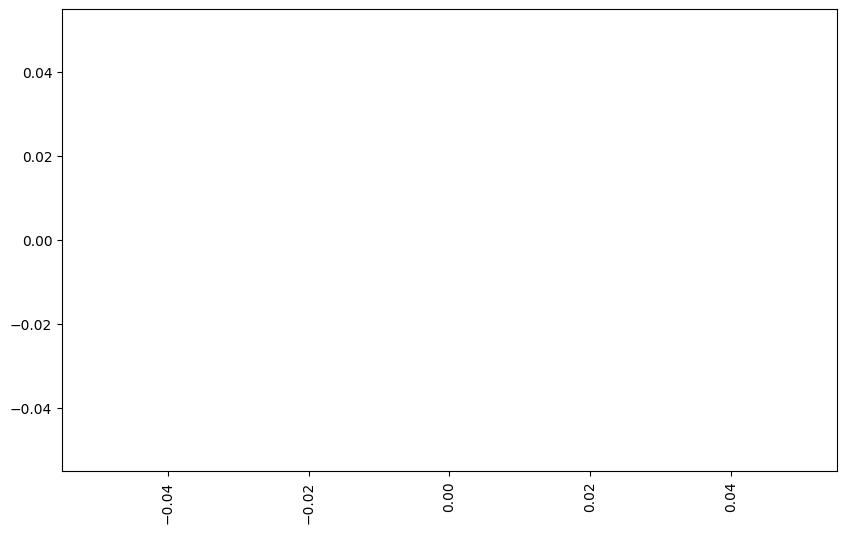

In [21]:
ballfieldsCounts= ballfields["field_name"].value_counts() #counting the field names
value_counts = ballfields["field_name"].value_counts() #creating variable value_counts 
filtered_counts = value_counts[value_counts > 2] #plotting only ballfields that have 3 or more
plt.figure(figsize=(10, 6)) #creating graph size to fit names
filtered_counts.plot(kind='bar') #creating a bar graph
plt.xticks(rotation=45) #rotating the names on the x axis to a 45 degree angle to prevent overlap
plt.xlabel('Field Names') #labeling the x axis as Field Names
plt.ylabel('# of ballfields') #labeling the y axis as # of ballfields
plt.title('Ballfields') #titling the graph as Ballfields
plt.tight_layout() #adjusts the size of the graph to fit the 10,6 parameters

In [ ]:
ballfieldsNb = pd.read_csv("ballfieldsData-Copy1.csv") #reads the file name and assigns it to variable ballfieldsNb
value_countsNb = ballfieldsNb["field_name"].value_counts() #assigns counting the field name values to variable value_countsNb
filtered_countsNb = value_countsNb[value_countsNb > 2] #plots only neighborhoods with 3 or more ballfields
plt.figure(figsize=(10, 6))  #creating graph size to fit names
filtered_countsNb.plot(kind='bar') #creating a bar graph
plt.xticks(rotation=45) #rotating the names on the x axis to a 45 degree angle to prevent overlap
plt.xlabel('Neighborhood Names') #labeling the x axis as Neighborhood Names
plt.ylabel('# of ballfields') #labeling the y axis as # of ballfields
plt.title('Ballfields') #titling the graph as Ballfields
plt.tight_layout() #adjusts the size of the graph to fit the 10,6 parameters

FileNotFoundError: [Errno 2] No such file or directory: 'ballfieldsData-Copy1.csv'